# Problem Set 2

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on bCourses). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from bCourses. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|

---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

In [1]:
import pandas as pd

prog_df = pd.read_csv('progresa_sample.csv')
prog_sub = prog_df.drop(labels=['year','folnum','village'], axis=1, inplace=False)
prog_sub.describe().loc[['mean','std']].T.sort_index()

,mean,std
age,11.366460,3.167744
dist_cap,147.674452,76.063134
dist_sec,2.418910,2.234109
fam_n,7.215715,2.352900
grc,3.963537,2.499063
grc97,3.705372,2.572387
hohage,44.436717,11.620372
hohedu,2.768104,2.656106
hohsex,0.925185,0.263095
hohwag,586.985312,788.133664


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows (alphabetized by variable name):

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|


In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import scipy as sp
# import IPython

# prog_df.dtypes
# print(prog_df.isnull().sum())

'''Subset samples into treatment group and control group, drop non-demographic variables'''
treat = prog_df[(prog_df.poor == 'pobre')&
                (prog_df.year == 97)&
                (prog_df.progresa != '0')].drop(labels=['year','folnum','village','progresa','poor','sc','grc'], axis=1, inplace=False)

control = prog_df[(prog_df.poor == 'pobre')&
                  (prog_df.year == 97)&
                  (prog_df.progresa == '0')].drop(labels=['year','folnum','village','progresa','poor','sc','grc'], axis=1, inplace=False)

'''Check the variance of two samples are same or different, so that use Students T-test or Welchs T-test'''
col_names = treat.columns.tolist()
# print(col_names)

t_c_varlst = []
for col in col_names:
    tvar, cvar = treat[col].dropna().var(ddof=1), control[col].dropna().var(ddof=1)
    t_c_varlst.append(tvar-cvar)

print(t_c_varlst) # variances are different, so adopt Welchs T-test in below

'''Run Welchs T-test, get p-values, calculate means and difference of means'''
difflst, plst, treatmean, contmean = [], [], [], []
for col in col_names:
#     IPython.embed() # a useful way to debug
    t, p = sp.stats.ttest_ind(treat[col].dropna(), control[col].dropna(), axis = 0, equal_var = False)
    plst.append(p) # append to list of p-value
    tmean, cmean = treat[col].dropna().mean(), control[col].dropna().mean() # calculate means
    treatmean.append(tmean)
    contmean.append(cmean)
    difflst.append(tmean - cmean) # calculate difference of means

'''Construct table'''
table1 = pd.DataFrame({'Variable name': col_names, 
                       'Average value (Treatment villages)': treatmean, 
                       'Average value (Control villages)': contmean, 
                       'Difference(Treat - Control)': difflst, 
                       'p-value': plst})
table1

[-0.0003553340737401378, -0.0021336478700164363, -1.6167179098577682, -0.18668589363005061, -243.6675561518839, -1366.1208886858913, 0.4521093320249534, -2999.9637633250095, -676.1540692595208, -0.0014506210740917874, -11.046938850375057, 0.036423815332602416, -0.09193133160441302, -0.0047962432517076325]


,Variable name,Average value (Treatment villages),Average value (Control villages),Difference(Treat - Control),p-value
0,sex,0.519317,0.505052,0.014265,1.220744e-02
1,indig,0.325986,0.332207,-0.006222,2.459021e-01
2,dist_sec,2.453122,2.507662,-0.054540,4.266282e-02
3,fam_n,7.281327,7.302469,-0.021142,4.289667e-01
4,min_dist,107.152915,103.237854,3.915060,7.055795e-16
5,dist_cap,150.829074,153.769730,-2.940656,1.146482e-03
6,hohedu,2.663139,2.590348,0.072791,1.038219e-02
7,hohwag,544.339544,573.163558,-28.824015,3.287285e-04
8,welfare_index,655.428377,659.579100,-4.150723,1.531678e-03
9,hohsex,0.924656,0.922947,0.001709,5.721253e-01


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

A: Our null hypothesis is there is no difference in the means between treatment and control groups of 14 variables. 
** For a two-tailed t-test, p-values are smaller than 0.05 for 8 out of the 14 variables (sex, dist_sec, min_dist, dist_cap, hohedu, hohwag, welfare_index, hohage), meaning we have 95% stistical confidence that the means of these variables in treatment and control groups are different. 
** For 6 out of the 14 variables (indig, fam_n, hohsex, age, grc97, sc97), we cannot reject the null hypothesis that there is no difference in the means of these variables between treatment and control groups. 
** In summary, the treatment and control groups have statistically significant differences in the baseline.

B: If there are differences at baseline, it will undermine our assumptions made for measuring the impact of treatment.

C: It implies that the two groups may have selection bias in sampling, so the measured impact of treatment may be biased too.

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

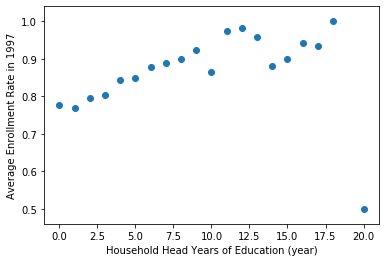

In [3]:
import matplotlib.pyplot as plt

plt.scatter(prog_df.groupby(by='hohedu')['hohedu','sc97'].mean()['hohedu'], prog_df.groupby(by='hohedu')['hohedu','sc97'].mean()['sc97'])
plt.xlabel('Household Head Years of Education (year)')
plt.ylabel('Average Enrollment Rate in 1997')
plt.show()

From the scatter plot above, we find a positive relation in the year of 1997 between years of schooling for household head and the average enrollment rates. However, we also have an outlier when years of education is 20, the average enrollment rate is 50%. This does not fit the trend for the rest of the sample and draws our attention.

### 1.5 Graphical exploration, part 2

Visualize the distribution of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). Does there appear to be a difference? Is this difference statistically significant?

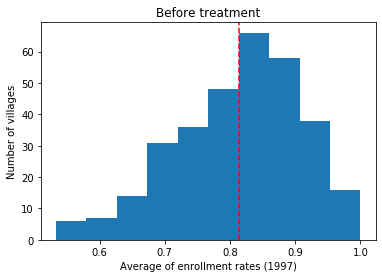

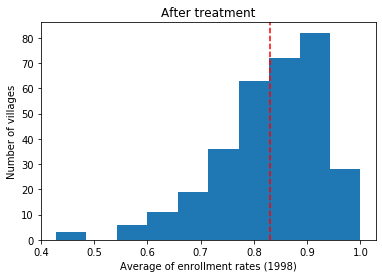

Ttest_indResult(statistic=-2.015713486515638, pvalue=0.044249343422588405)

In [4]:
'''Subset poor households in treated villages, show average of enrollment group by villages'''
before = prog_df[(prog_df.poor == "pobre") & (prog_df.progresa != "0") & (prog_df.year == 97)].groupby(by='village')['sc'].mean()
after = prog_df[(prog_df.poor == "pobre") & (prog_df.progresa != "0") & (prog_df.year == 98)].groupby(by='village')['sc'].mean()

'''Construct histograms for before and after treatment'''
hist_before = plt.hist(before)
plt.axvline(x=before.mean(), color='r', linestyle='--')
plt.title('Before treatment')
plt.xlabel('Average of enrollment rates (1997)')
plt.ylabel('Number of villages')
plt.show()

hist_after = plt.hist(after)
plt.axvline(x=after.mean(), color='r', linestyle='--')
plt.title('After treatment')
plt.xlabel('Average of enrollment rates (1998)')
plt.ylabel('Number of villages')
plt.show()

'''T-test to check difference before and after treatment'''
sp.stats.ttest_ind(before.dropna(), after.dropna(), axis = 0, equal_var = False)

There is some difference regarding the distribution of enrollment rates in before and after. After the treatment, the average of enrollment rate has increased for all households. Distribution becomes more left-skewed after treatment, and the number of villages above average value has substantially increased.

According to T-test result, p-value is smaller than 0.05 so we have 95% confidence to state that before and after treatment distributions have statistically significant different.

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on the poor (those with poor=='pobre'), since only the poor were eligible to receive the PROGRESA assistance.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [6]:
'''Subset poor households in control and treatment villages, calculate means of enrollment rates'''
treat_98 = prog_df[(prog_df.poor == "pobre")&(prog_df.progresa != "0")&(prog_df.year == 98)]['sc'].dropna()
control_98 = prog_df[(prog_df.poor == "pobre")&(prog_df.progresa == "0")&(prog_df.year == 98)]['sc'].dropna()
 '''Run T-test to check difference in treatment and control groups in 1998'''
print(sp.stats.ttest_ind(treat_98, control_98, axis = 0, equal_var = False))

print('The treatment effect is estimated as: ', treat_98.mean()-control_98.mean())

Ttest_indResult(statistic=8.181477157107308, pvalue=2.9655072988948406e-16)
The treatment effect is estimated as:  0.0388421646651228


Since p-value is smaller than 0.05, we are 95% confident to say that there is statistically significant difference in the means of control and treatment groups in 1998.

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. For now, do not include any other variables in your regression. Discuss the following:

* Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? Make sure you express you answer in a sentence that your grandmother could understand, using appropriate units.
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import scipy as sp

'''Change value of progresa'''
prog_df.loc[prog_df['progresa'] == 'basal','progresa'] = 1
prog_df.loc[prog_df['progresa'] == '0','progresa'] = 0

'''Subset dataframe and run OLS'''
sc98 = prog_df[(prog_df.poor == "pobre")&(prog_df.year == 98)].sc
progre = prog_df[(prog_df.poor == "pobre")&(prog_df.year == 98)].progresa
model1_df = pd.DataFrame({"sc98": sc98, "progresa": progre}).dropna()

model1 = smf.ols(formula='sc98 ~ progresa', data=model1_df).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   sc98   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Mon, 10 Feb 2020   Prob (F-statistic):           6.64e-17
Time:                        20:58:44   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8076      0.004    220.676      0.0

Based on this model, every 1000 more poor children joining Progresa will have about 39 more children enrolling in school in the year 1998. It is in line with the conclusion in 2.1, the change in enrollment rates before and after treatment is statistically significant. Since p-value is lower than 0.05, we have 95% confidence to reject the null hypothesis that treatment effects are zero. The counterfactual assumption is that enrollment of poor for treatment and control groups are the same, in the absence of Progresa.

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [8]:
'''Adding new control variables'''
age = prog_df[(prog_df.poor == "pobre")&(prog_df.year == 98)].age
dsec = prog_df[(prog_df.poor == "pobre")&(prog_df.year == 98)].dist_sec
gender = prog_df[(prog_df.poor == "pobre")&(prog_df.year == 98)].sex
hohedu = prog_df[(prog_df.poor == "pobre")&(prog_df.year == 98)].hohedu
welf = prog_df[(prog_df.poor == "pobre")&(prog_df.year == 98)].welfare_index
indig = prog_df[(prog_df.poor == "pobre")&(prog_df.year == 98)].indig

model2_df = pd.DataFrame({"sc98": sc98, "progresa": progre, "age": age, "dist_sec": dsec, "gender": gender, 
                          "hohedu": hohedu, "welfare_index": welf, "indig": indig}).dropna()

model2 = smf.ols(formula='sc98 ~ progresa + age + dist_sec + C(gender) + hohedu + welfare_index + indig', data=model2_df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   sc98   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     1419.
Date:                Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:58:44   Log-Likelihood:                -7639.4
No. Observations:               27267   AIC:                         1.529e+04
Df Residuals:                   27259   BIC:                         1.536e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5025      0.014  

After adding a set of controls, the coefficient of progresa has decreased from 0.0388 to 0.0352, while standard error also decreased from 0.005 to 0.004. Comparing 2.2 and 2.3, the estimation of treatment effects is more accurate since some of the effects resulting from the change of controls are separated from the coefficient of progresa and enrollment rates. Keeping other variables constant is important. The standard error measures the average distance that the observed values fall from the regression line, so it decreased means the regression model is more accurate than the last model.

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [9]:
'''Tabular method to calculate average treatment effects using Double Differences'''
t_98 = prog_df[(prog_df.poor == "pobre")&(prog_df.year == 98)&(prog_df.progresa == 1)]['sc'].mean()
t_97 = prog_df[(prog_df.poor == "pobre")&(prog_df.year == 97)&(prog_df.progresa == 1)]['sc'].mean()
c_98 = prog_df[(prog_df.poor == "pobre")&(prog_df.year == 98)&(prog_df.progresa == 0)]['sc'].mean()
c_97 = prog_df[(prog_df.poor == "pobre")&(prog_df.year == 97)&(prog_df.progresa == 0)]['sc'].mean()

t_98-c_98-(t_97-c_97)

0.031331280319323085

My estimation of the treatment effect is 0.031, and the effect is smaller than what the simple difference model estimated. The counterfactual assumption is that in the absence of treatment, the difference for treatment group between 98 and 97 is the same as the difference for control group over the same time.

### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [10]:
'''Regression to calculate Double Differences'''
'''rest value of year so can be easily used in DID interpretation'''
prog_df.loc[prog_df['year'] == 97, 'year'] = 0
prog_df.loc[prog_df['year'] == 98, 'year'] = 1
# prog_df.year = np.where(prog_df.year == 97, 0, 1) # better way to replace

sc1 = prog_df.loc[prog_df['poor'] == "pobre", 'sc']
progresa1 = prog_df.loc[prog_df['poor'] == "pobre", 'progresa']
year1 = prog_df.loc[prog_df['poor'] == "pobre", 'year']
age1 = prog_df.loc[prog_df['poor'] == "pobre", 'age']
dsec1 = prog_df.loc[prog_df['poor'] == "pobre", 'dist_sec']
gender1 = prog_df.loc[prog_df['poor'] == "pobre", 'sex']
hohedu1 = prog_df.loc[prog_df['poor'] == "pobre", 'hohedu']
indig1 = prog_df.loc[prog_df['poor'] == "pobre", 'indig']
grc = prog_df.loc[prog_df['poor'] == "pobre", 'grc']

model3_df = pd.DataFrame({"sc": sc1, "progresa": progresa1, "year": year1, "age": age1, "dist_sec": dsec1, "gender": gender1, 
                        "hohedu": hohedu1, "indig": indig1, "grc": grc}).dropna()

model3 = smf.ols(formula='sc ~ progresa * year + age + dist_sec + C(gender) + hohedu + indig + grc', data=model3_df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     2863.
Date:                Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:58:44   Log-Likelihood:                -15537.
No. Observations:               58105   AIC:                         3.109e+04
Df Residuals:                   58095   BIC:                         3.118e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.6651      0.007  

Using difference in difference method, we have 95% statistical confidence to say that with every 1000 more children joining progresa program, there are about 37 more children enrolling in school over the time of 1997 to 1998, keeping a set of control variables constant.

The measured size of treatment effect with DiD is actually smaller than the simple difference model, due to the fact that we consider the temporal change of treatment group in the absence of treatment. The result seems be more accurate.

The measured size of treatment effect is slightly smaller than 2.4's result. The differences could be due to the control of several other variables.

The counterfactual assumption in this model is that in the absence of treatment, the change of treatment group and control group over the time 1997 to 1998 is the same.

### 2.6 Spillover effects

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, instead focusing on the impact of PROGRESA on non-poor households. 
* Do you observe any impacts of PROGRESA on the non-poor?
* Regardless of whether you find evidence of spillovers, describe one or two reasons why PROGRESA *might* have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented.

In [11]:
'''Regression to calculate Double Differences for non-poor, see any significant spillover effect'''

sc1 = prog_df.loc[prog_df['poor'] != "pobre", 'sc']
progresa1 = prog_df.loc[prog_df['poor'] != "pobre", 'progresa']
year1 = prog_df.loc[prog_df['poor'] != "pobre", 'year']
age1 = prog_df.loc[prog_df['poor'] != "pobre", 'age']
dsec1 = prog_df.loc[prog_df['poor'] != "pobre", 'dist_sec']
gender1 = prog_df.loc[prog_df['poor'] != "pobre", 'sex']
hohedu1 = prog_df.loc[prog_df['poor'] != "pobre", 'hohedu']
indig1 = prog_df.loc[prog_df['poor'] != "pobre", 'indig']
grc = prog_df.loc[prog_df['poor'] != "pobre", 'grc']

model4_df = pd.DataFrame({"sc": sc1, "progresa": progresa1, "year": year1, "age": age1, "dist_sec": dsec1, "gender": gender1, 
                        "hohedu": hohedu1, "indig": indig1, "grc": grc}).dropna()

model4 = smf.ols(formula='sc ~ progresa * year + age + dist_sec + C(gender) + hohedu + indig + grc', data=model4_df).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     571.4
Date:                Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:58:44   Log-Likelihood:                -3332.8
No. Observations:               10363   AIC:                             6686.
Df Residuals:                   10353   BIC:                             6758.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.7881      0.019  

No, the treatment effect measured by the interaction term has a p-value that is too large, meaning we cannot reject the null hypothesis. Non-poor showed no significant difference over 1997-1998 due to the treatment. There is no observed spillover effect from the result. However, contrary to our understanding that non-poor are ineligible for progresa, we find progresa also has coefficient that is statistically significant, indicating some non-poor households also get assigned with progresa subsidies and have some treatment effect. We may need to look into the beneficiary assignment method to understand why.

One case of spillover effects could be that the progresa program raised the awareness of importance of sending children to school, so even non-poor family are not selected to get subsidies, they feel worried if not sending their kids to school while the poor counterparts do, so non-poor also intentionally send more kids from their households to school. Another case could be that the kids participated in progresa program also gained more attention from the household and neighborhoods, so resources are relocated more in favor of poor kids (e.g. commuting assistance), which could bring about some negative spillover effect on non-poor kids from the same household/neighborhood who could have attended school.

### 2.7 Summary

* Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico? 
* Describe one other way that you might analyze these data to further investigate the causal impact of Progresa on enrollment, and clearly state the counterfactual assumption you would need to make for that approach to be valid.  *(Hint: Consider using the non-poor in your analysis)*

Yes, I believe Progresa had a causal impact on the enrollment rates of poor households in Mexico, although the magnitude of impact was not very big.

As we found in 1.2, the baseline doesn't show a very good randomization in sampling. We know that difference in difference is a method to be best used in randomized experiment, we can consider methods, such as Instrumental Variable (IV) or Regression Discontinuity (RD). 

If we use RD, we use welfare index to set a cut-off point to divide poor and non-poor and time is the running variable. The original functional form of school enrollment rates and welfare index can be specified and other factors determine the enrollment outcome are found to be continuous. We will compare after treatment if the poor group has an outstanding increase in enrollment rates and a gap appear at the cut-off point of poor and non-poor in 1998. 

The counterfactual assumption is in the absence of treatment, poor and non-poor will follow the same functional form over the period of 1997-1998.